In [28]:
## Imports 
import pandas as pd
import numpy as np
import missingno as msno


In [29]:
## Loading data
data = pd.read_csv("./Dataset/city_day.csv")

In [30]:
### Data Exploration 

In [31]:
print(data.head())

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [33]:
print(data.describe())

              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775    

In [34]:
print(data.shape)

(29531, 16)


In [35]:
print('Columns:', data.columns)

Columns: Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [36]:
# Display the data types of each column
print('Data types:', data.dtypes)

Data types: City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


DATA CLEANING

missingno` is a Python library used for visualizing missing data in datasets
It provides a suite of visualizations and statistical tests for missing data completeness and pattern,
making it easier for data analysts to understand and address the presence of missing data

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


<Axes: >

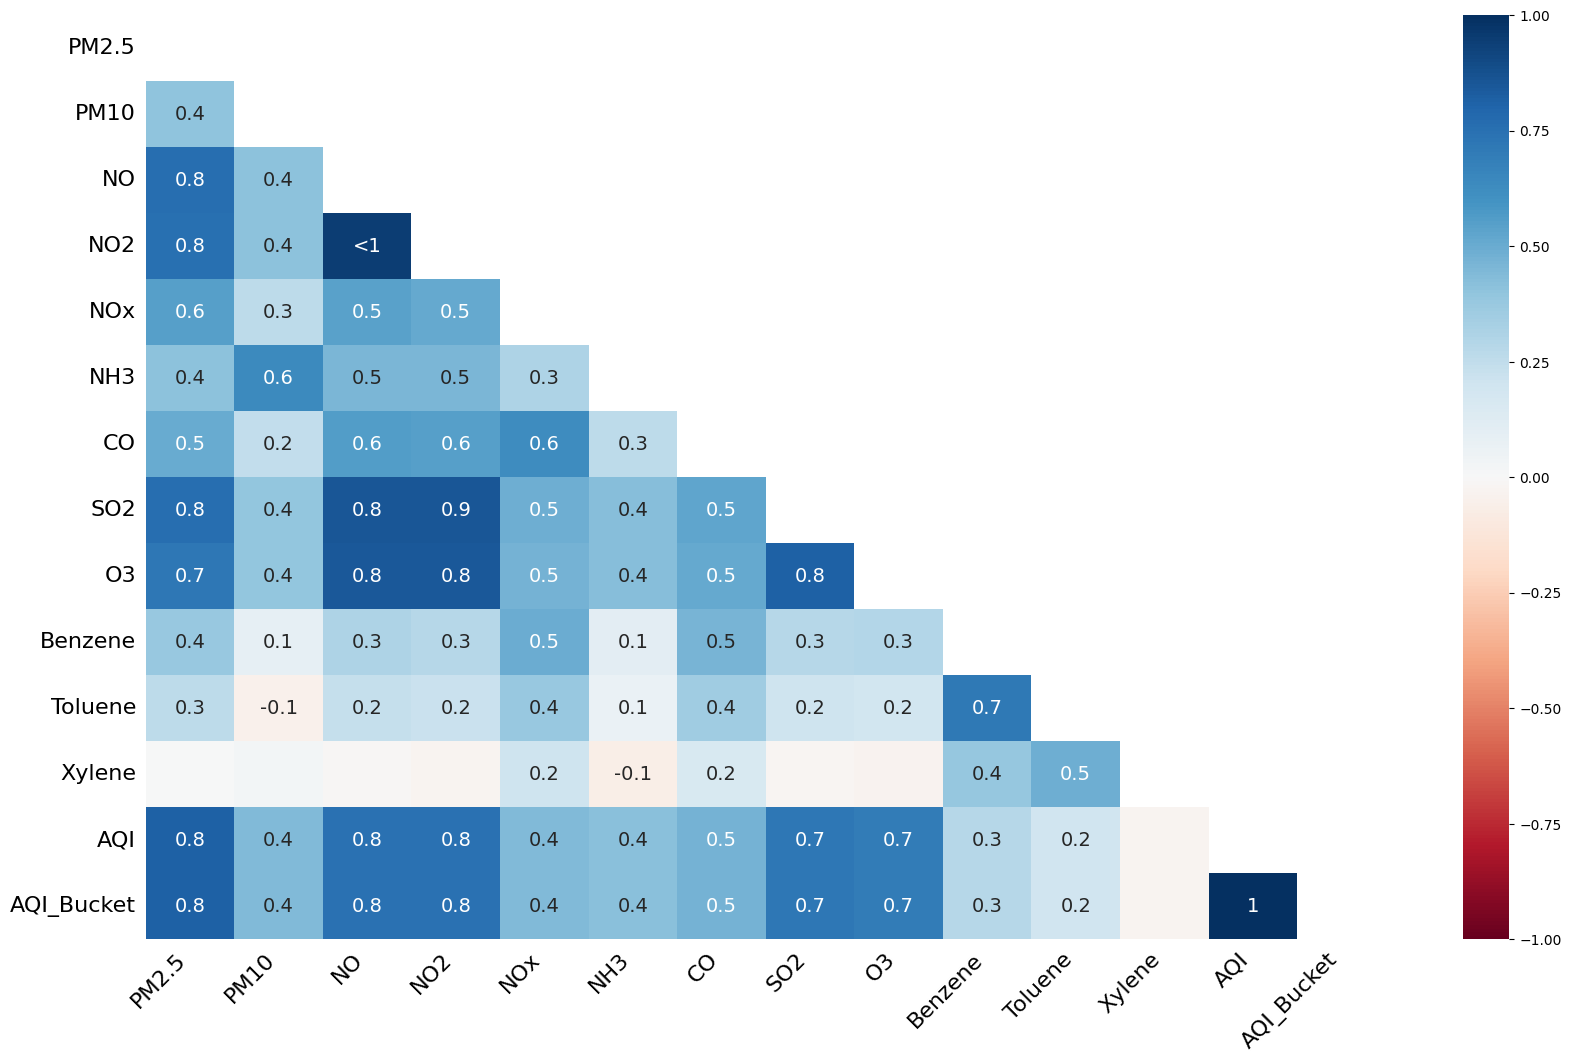

In [37]:
# Check for missing values
print(data.isnull().sum())
msno.heatmap(data)

Handling Missing Values

In [38]:
# Fill missing values with mean
for col in data.columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].mean(), inplace=True)


In [39]:
# Check for missing values after Handling it
print(data.isnull().sum())

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64


In [40]:
# Statistical summary
print(data.describe())

              PM2.5          PM10           NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.00000  29531.000000  29531.000000   
mean      67.450578    118.127103     17.57473     28.560659     32.309123   
std       59.414476     71.500953     21.35922     22.941051     29.317936   
min        0.040000      0.010000      0.02000      0.010000      0.000000   
25%       32.150000     79.315000      6.21000     12.980000     14.670000   
50%       58.030000    118.127103     11.53000     25.240000     27.550000   
75%       72.450000    118.127103     17.57473     34.665000     36.015000   
max      949.990000   1000.000000    390.68000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       20.711370      6.715753     16.909088     20.16344

In [42]:

# Correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.558079  0.426375  0.344341  0.380725  0.189227  0.086663   
PM10     0.558079  1.000000  0.431006  0.359165  0.415133  0.223025  0.047517   
NO       0.426375  0.431006  1.000000  0.462402  0.746223  0.156394  0.211639   
NO2      0.344341  0.359165  0.462402  1.000000  0.574190  0.165984  0.353237   
NOx      0.380725  0.415133  0.746223  0.574190  1.000000  0.128051  0.225097   
NH3      0.189227  0.223025  0.156394  0.165984  0.128051  1.000000  0.020029   
CO       0.086663  0.047517  0.211639  0.353237  0.225097  0.020029  1.000000   
SO2      0.119512  0.176188  0.166190  0.382758  0.208355 -0.021005  0.472583   
O3       0.155330  0.203595  0.014218  0.285448  0.083063  0.078688  0.039787   
Benzene  0.021934  0.019215  0.033901  0.025082  0.037383 -0.011864  0.061351   
Toluene  0.107788  0.121983  0.134201  0.254074  0.168780  0.007442  0.274882   
Xylene   0.070459  0.031256 